# Image Processing with PyTorch

Author: Adrian Ramos Perez
    adrian.ramos@iteso.mx

Imports to work with dataframes:

In [5]:
import os

from skimage.io import (imread, imshow)
from skimage.transform import resize
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [6]:
# Pytorch imports:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
# Tqdm for display progress bar:
from tqdm import tqdm

Tensorflow imports:

In [56]:
import tensorflow as tf
from tensorflow import keras as tf_ks
import tensorflow.keras.models
import tensorflow.keras.layers as tk_ks_l
import tensorflow.keras.optimizers

In [8]:
## General variables:
img_width, img_height, img_channels = 128, 128, 3
TRAIN_PATH, TEST_PATH = '../data/CT/train/',''
path = '../data/CT/train/'
train_ids = next(os.walk(TRAIN_PATH))[1]

In [71]:
img_num = 400
img_num

400

## Images dataset Loading 

#### Loading image from numpy format (faster and better):

In [86]:
npy_img = np.load('CT_data.npy')
npy_img.shape

(400, 128, 128, 3)

#### Loading images from .png files:

In [74]:
img_arr = np.zeros((img_num, img_height, img_width, img_channels), dtype=np.uint8)
img_arr.shape

(400, 128, 128, 3)

Read all the files in the directory and resize them to 128x128x3

In [77]:
id_=0
for n in tqdm(range(400)):#enumerate(train_ids), total=len(train_ids)):
    
    if(id_<10):
        img = imread(path+'00'+str(id_)+'.png')[:,:,:img_channels]
    elif(100<=id_):
        img = imread(path+str(id_)+'.png')[:,:,:img_channels]
    else:
        img = imread(path+'0'+str(id_)+'.png')[:,:,:img_channels]
       
    img_arr[n] = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    id_+=1
img_arr.shape

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:22<00:00, 18.06it/s]


Loading random image from the set:

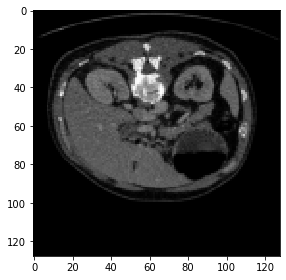

In [107]:
imshow(img_arr[np.random.randint(img_num)])

In [58]:
X_train = np.zeros((len(train_ids), img_height, img_width, img_channels), dtype=np.uint8)
X_train

array([], shape=(0, 128, 128, 3), dtype=uint8)

In [59]:
Y_train = np.zeros((len(train_ids), img_height, img_width, 1), dtype=np.uint8)
Y_train

array([], shape=(0, 128, 128, 1), dtype=uint8)

Dump image array into a numpy file format to load faster nex time:

In [83]:
np.save('CT_data.npy', img_arr)

## Mask generation
For each CT slide a mask shall be generated:

In [112]:
mask_arr = np.zeros((img_num, img_height, img_width, 1), dtype=bool)
mask_arr.shape

(400, 128, 128, 1)

In [62]:
id_ = 0

img=[[],[],[]]
id_ = 0
for n in tqdm(range(400)):#enumerate(train_ids), total=len(train_ids)):
    
    mask = np.zeros((img_height, img_width, 1), dtype=bool)
    
    if(id_<10):
        img = imread(path+'00'+str(id_)+'.png')[:,:,:img_channels]
        mask_ = imread(path+'00'+str(id_)+'_mask'+'.png')
    elif(100<=id_):
        img = imread(path+str(id_)+'.png')[:,:,:img_channels]
        mask_ = imread(path+str(id_)+'_mask'+'.png')
    else:
        img = imread(path+'0'+str(id_)+'.png')[:,:,:img_channels]
        mask_ = imread(path+'0'+str(id_)+'_mask'+'.png')
       
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_train[n] = img
    
    mask_ = resize(mask_, (img_height, img_width, 1), mode='constant', preserve_range=True)
    mask = np.maximum(mask, mask_)
    Y_train[n] = mask
    id_+=1

  0%|                                                                                          | 0/400 [00:00<?, ?it/s]


AttributeError: 'list' object has no attribute 'shape'

In [51]:
img.shape

(512, 512, 3)

In [37]:
id_ = 0
for n in tqdm(range(400)):#enumerate(train_ids), total=len(train_ids)):
    
    mask = np.zeros((img_height, img_width, 1), dtype=bool)
    
    if(id_<10):
        img = imread(path+'00'+str(id_)+'.png')[:,:,:img_channels]
        mask_ = imread(path+'00'+str(id_)+'_mask'+'.png')
    elif(100<=id_):
        img = imread(path+str(id_)+'.png')[:,:,:img_channels]
        mask_ = imread(path+str(id_)+'_mask'+'.png')
    else:
        img = imread(path+'0'+str(id_)+'.png')[:,:,:img_channels]
        mask_ = imread(path+'0'+str(id_)+'_mask'+'.png')
       
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    X_train[n] = img
    
    mask_ = resize(mask_, (img_height, img_width, 1), mode='constant', preserve_range=True)
    mask = np.maximum(mask, mask_)
    Y_train[n] = mask
    id_+=1
    
X_train[299]
    

  0%|                                                                                          | 0/400 [00:00<?, ?it/s]


NameError: name 'X_train' is not defined

In [37]:
X_train

array([], shape=(0, 128, 128, 3), dtype=uint8)

## Neural Model creation

For reference:
https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module

In [5]:
class Net(torch.nn.Module):
    def __init__(self, in_num, out,_num):
        super(Net, self).__init__()
        

In [6]:
model = Net()

TypeError: __init__() missing 3 required positional arguments: 'in_num', 'out', and '_num'

# Saving and exporting model

Dump model into pickle file:

In [7]:
torch.save(model, "mpg.pkl")

NameError: name 'model' is not defined

Loading a model:

In [11]:
n = 11
var = 0
exp = 10**(n-1)
for i in range(1,n+1):
    if i < 9:
        var += i*exp
        exp = 10**(n-1-i)
    else:
        
        var += i*exp
        exp = 10**(n-2-i)
    
print(var)

12345678911.1


In [13]:
import math
math.log10(93)

1.968482948553935